In [47]:
%load_ext autoreload
%autoreload 2
import numpy as np, h5py, os, matplotlib.pyplot as plt
from math import sqrt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
output_path = "../hdf5/Scan_{0:d}/scan_{0:d}_data.h5"
up_path = "Detectors/Lambda_Up"
far_path = "Detectors/Lambda_Far"
down_path = "Detectors/Lambda_Down"
preface = "# Datetime;Timestam"
roi = (slice(None), slice(None))

In [102]:
scan_file = h5py.File(os.path.abspath(output_path.format(143)), 'r')
data_far = scan_file[far_path][:]
data_up = scan_file[up_path][:]
data_down = scan_file[down_path][:]

In [92]:
np.mean(data_far[0], axis=0).shape

(516, 772)

In [105]:
slows, fasts = [], []
counter, size = 0, int(sqrt(data_far.shape[0]))
lines = [line for line in open('/Users/nivanov/OneDrive/programming/p07_data/Scan_143.log', 'r') if not line.startswith('#')]
del lines[1::43]
for line in lines[1::2]:
    parts = line.split(';')
    try:
        slows.append(float(parts[-2].strip('um')))
        fasts.append(float(parts[-2].strip('um')))
    except:
        continue
slows = np.array(slows)
fasts = np.array(fasts)
print(fasts.shape, slows.shape)

(441,) (441,)


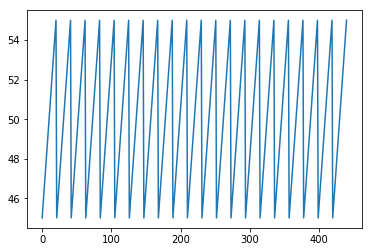

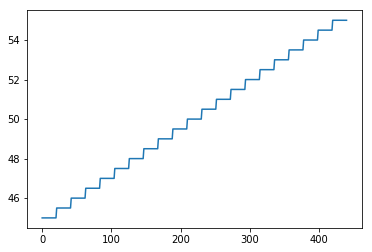

In [90]:
%matplotlib inline
plt.figure()
plt.plot(fasts)
plt.figure()
plt.plot(slows)
plt.show()

In [103]:
sums_far = data_far.sum(axis=(-2, -1)).reshape((size, size))
sums_up = data_up.sum(axis=(-2, -1)).reshape((size, size))

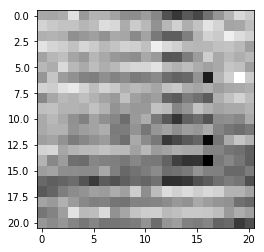

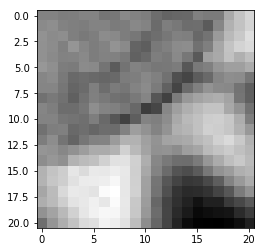

In [104]:
%matplotlib inline
plt.figure()
plt.imshow(sums_far, cmap='gist_gray')
plt.figure()
plt.imshow(sums_up, cmap='gist_gray')
plt.show()